# LINKS

- ## [join/merge DF python pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html)


---

In [1]:
import os, sys, time
from time import sleep
from pathlib import Path
from datetime import datetime, timedelta

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import pyodbc

In [3]:
from openpyxl import Workbook, load_workbook
from openpyxl.drawing.image import Image
from openpyxl.utils.dataframe import dataframe_to_rows

In [4]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
# [2020-02-19]]\\import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
[x for x in pyodbc.drivers() if x.startswith('Microsoft Access Driver')]

['Microsoft Access Driver (*.mdb, *.accdb)']

## *FUNCTIONS*

In [6]:
def send_mail(send_from, send_to, subject, message, files=[],
              server="cos.smtp.agilent.com", port=587, use_tls=True):  # {
    print("SENDING MAIL... DATE == " + str(pd.Timestamp.now())[:10])
    msg = MIMEMultipart()
    msg['From'] = send_from
    msg['To'] = COMMASPACE.join(send_to)
    msg['Date'] = formatdate(localtime=True)
    msg['Subject'] = subject

    msg.attach(MIMEText(message))

    for path in files:  # {
        part = MIMEBase('application', "octet-stream")
        with open(path, 'rb') as file:  # {
            part.set_payload(file.read())
        # }
        encoders.encode_base64(part)
        part.add_header('Content-Disposition',
                        'attachment; filename="{}"'.format(op.basename(path)))
        msg.attach(part)
    # }

    smtp = smtplib.SMTP(server, port)
    if use_tls:  # {
        smtp.starttls()
    # }
    smtp.sendmail(send_from, send_to, msg.as_string())
    smtp.quit()
# }

In [7]:
def pull_prodflow_data(table_name): # {
    pass
# }

In [8]:
def push_prodflow_data(table_name): # {
    pass
# }

## Ask for `Email Address`:

## Ask for `Date`:

In [9]:
date_input = input("Input a Date:")

Input a Date: 2020-02-25


In [10]:
# the_date = pd.Timestamp.now()
test_date = pd.Timestamp(ts_input=str(date_input))
print(test_date)

2020-02-25 00:00:00


In [11]:
td_one_month_ago = test_date - pd.Timedelta(unit='M', value=1)
print(td_one_month_ago)

2020-01-25 13:30:54


C:\Users\derbates\miniconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: M and Y units are deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


In [12]:
one_month_ago = test_date - timedelta(days = 30)

In [13]:
print("ONE MONTH AGO == " + str(one_month_ago))

ONE MONTH AGO == 2020-01-26 00:00:00


In [14]:
# DAILY METRICS
# df_week_range = pd.date_range(start=one_month_ago, end=test_date, freq="M-SAT")
df_month_range = pd.date_range(start=one_month_ago, end=test_date, freq='D') #, periods=30)

In [15]:
type(df_month_range)

pandas.core.indexes.datetimes.DatetimeIndex

In [16]:
list(df_month_range)

[Timestamp('2020-01-26 00:00:00', freq='D'),
 Timestamp('2020-01-27 00:00:00', freq='D'),
 Timestamp('2020-01-28 00:00:00', freq='D'),
 Timestamp('2020-01-29 00:00:00', freq='D'),
 Timestamp('2020-01-30 00:00:00', freq='D'),
 Timestamp('2020-01-31 00:00:00', freq='D'),
 Timestamp('2020-02-01 00:00:00', freq='D'),
 Timestamp('2020-02-02 00:00:00', freq='D'),
 Timestamp('2020-02-03 00:00:00', freq='D'),
 Timestamp('2020-02-04 00:00:00', freq='D'),
 Timestamp('2020-02-05 00:00:00', freq='D'),
 Timestamp('2020-02-06 00:00:00', freq='D'),
 Timestamp('2020-02-07 00:00:00', freq='D'),
 Timestamp('2020-02-08 00:00:00', freq='D'),
 Timestamp('2020-02-09 00:00:00', freq='D'),
 Timestamp('2020-02-10 00:00:00', freq='D'),
 Timestamp('2020-02-11 00:00:00', freq='D'),
 Timestamp('2020-02-12 00:00:00', freq='D'),
 Timestamp('2020-02-13 00:00:00', freq='D'),
 Timestamp('2020-02-14 00:00:00', freq='D'),
 Timestamp('2020-02-15 00:00:00', freq='D'),
 Timestamp('2020-02-16 00:00:00', freq='D'),
 Timestamp

In [17]:
df_month_range = pd.DataFrame(pd.Series(df_month_range), columns=['QCDate'])

In [18]:
print(df_month_range)

       QCDate
0  2020-01-26
1  2020-01-27
2  2020-01-28
3  2020-01-29
4  2020-01-30
5  2020-01-31
6  2020-02-01
7  2020-02-02
8  2020-02-03
9  2020-02-04
10 2020-02-05
11 2020-02-06
12 2020-02-07
13 2020-02-08
14 2020-02-09
15 2020-02-10
16 2020-02-11
17 2020-02-12
18 2020-02-13
19 2020-02-14
20 2020-02-15
21 2020-02-16
22 2020-02-17
23 2020-02-18
24 2020-02-19
25 2020-02-20
26 2020-02-21
27 2020-02-22
28 2020-02-23
29 2020-02-24
30 2020-02-25


In [19]:
type(df_month_range)

pandas.core.frame.DataFrame

In [20]:
df_month_range.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 1 columns):
QCDate    31 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 376.0 bytes


In [21]:
# MONTHLY METRICS
year_range = pd.date_range(end=test_date, freq='M', periods=12, name='QCDate')

In [22]:
print(year_range)

DatetimeIndex(['2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31'],
              dtype='datetime64[ns]', name='QCDate', freq='M')


---
### create *connection string* for [`SQL-Server`][`ProdflowII_Prod`] (for `Products` Table)
#### called `cnxn_Prodflow`

In [23]:
conn_str = str(
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=wtkngappflow1.is.agilent.net;'
    r'DATABASE=ProdFlowII_Prod;'
    r'Trusted_Connection=yes;'
)

try: #{
    cnxn_Prodflow = pyodbc.connect(conn_str)
    crsr_Prodflow = cnxn_Prodflow.cursor()
#}
except: #{
    errorMessage = str(sys.exc_info()[0]) + "\n"
    errorMessage = errorMessage + str(sys.exc_info()[1]) + "\n\t\t"
    errorMessage = errorMessage + str(sys.exc_info()[2]) + "\n"
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    typeE = str("TYPE : " + str(exc_type))
    fileE = str("FILE : " + str(fname))
    lineE = str("LINE : " + str(exc_tb.tb_lineno))
    messageE = str("MESG : " + "\n\n" + str(errorMessage) + "\n")
    print("\n" + typeE + 
          "\n" + fileE + 
          "\n" + lineE + 
          "\n" + messageE)
#}
else: #{
    print("FIN...")
#}

FIN...


### create *connection string* for [`SQL-Server`][`Prodflow`] (for `tblProdflow` table)
#### called `cnxn_Prodflow2`

In [24]:
conn_str = str(
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=wtkngappflow1.is.agilent.net;'
    r'DATABASE=ProdFlow;'
    r'Trusted_Connection=yes;'
)

try: # {
    cnxn_Prodflow2 = pyodbc.connect(conn_str)
    crsr_Prodflow2 = cnxn_Prodflow2.cursor()
# }
except: # { 
    errorMessage = str(sys.exc_info()[0]) + "\n"
    errorMessage = errorMessage + str(sys.exc_info()[1]) + "\n\t\t"
    errorMessage = errorMessage + str(sys.exc_info()[2]) + "\n"
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    typeE = str("TYPE : " + str(exc_type))
    fileE = str("FILE : " + str(fname))
    lineE = str("LINE : " + str(exc_tb.tb_lineno))
    messageE = str("MESG : " + "\n\n" + str(errorMessage) + "\n")
    print("\n" + typeE + 
          "\n" + fileE + 
          "\n" + lineE + 
          "\n" + messageE)
# }
else: # {
    print("FIN...")
# }

FIN...


## `PRODUCTS` Table

In [25]:
# TRY THE FOLLOWING
try: # {
    df_products = pd.read_sql_query(sql='SELECT * FROM Products', con=cnxn_Prodflow)
# }
except: # {
    errorMessage = str(sys.exc_info()[0]) + "\n"
    errorMessage = errorMessage + str(sys.exc_info()[1]) + "\n\t\t"
    errorMessage = errorMessage + str(sys.exc_info()[2]) + "\n"
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    typeE = str("TYPE : " + str(exc_type))
    fileE = str("FILE : " + str(fname))
    lineE = str("LINE : " + str(exc_tb.tb_lineno))
    messageE = str("MESG : " + "\n\n" + str(errorMessage) + "\n")
    print("\n" + typeE + 
          "\n" + fileE + 
          "\n" + lineE + 
          "\n" + messageE)
# }
else: # {
    print("Operation Completed Successfully...")
    print(df_products.info())
    # [2020-02-25]\\print(products_info)
    # [2020-02-25]\\products_info.to_csv("products_INFO.csv", index=True)
# }

Operation Completed Successfully...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108317 entries, 0 to 108316
Data columns (total 42 columns):
ProductID          108317 non-null int64
Product#           108317 non-null object
ProductName        108289 non-null object
LineID             108317 non-null int64
Description        5973 non-null object
Specials           2443 non-null object
OriginationDate    107923 non-null datetime64[ns]
EntryDate          108315 non-null datetime64[ns]
Status             6036 non-null object
MatrixNumber       107433 non-null object
Components         108317 non-null int64
Availability       4843 non-null object
EquivalentSoln     102873 non-null object
EquivalentNeat     103031 non-null object
Packaging          107524 non-null object
Storage            100689 non-null object
ExpirationDate     108292 non-null float64
ShipType           95115 non-null object
UN#                93432 non-null object
ShipClass          87340 non-null object
PackGrp   

## `tblProdflow` Table

In [26]:
# TRY THE FOLLOWING
try: # {
    df_tblProdflow = pd.read_sql_query(sql='SELECT * FROM tblProdflow', 
                                       parse_dates = ['QCDate'],
                                       con=cnxn_Prodflow2)
# }
except: # {
    errorMessage = str(sys.exc_info()[0]) + "\n"
    errorMessage = errorMessage + str(sys.exc_info()[1]) + "\n\t\t"
    errorMessage = errorMessage + str(sys.exc_info()[2]) + "\n"
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    typeE = str("TYPE : " + str(exc_type))
    fileE = str("FILE : " + str(fname))
    lineE = str("LINE : " + str(exc_tb.tb_lineno))
    messageE = str("MESG : " + "\n\n" + str(errorMessage) + "\n")
    print("\n" + typeE + 
          "\n" + fileE + 
          "\n" + lineE + 
          "\n" + messageE)
# }
else: # {
    print("Operation Completed Successfully...")
    print(df_tblProdflow.info())
    # [2020-02-25]\\print(tblProdflow_info)
    # [2020-02-25]\\tblProdflow_info.to_csv("tblProdflow_INFO.csv", index=True)
# }

Operation Completed Successfully...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108592 entries, 0 to 108591
Data columns (total 53 columns):
PfIDNo              108592 non-null int64
PfBatchID           108592 non-null object
ProductNo           108573 non-null object
OrdID               92460 non-null float64
QuoteNo             108556 non-null object
PfSentTo            108527 non-null object
PrepDate            107578 non-null datetime64[ns]
PrepVolume          108547 non-null float64
PrepUnit            108516 non-null object
PrepVessel          108513 non-null float64
PrepVBarcode        57907 non-null object
PrdSaleUnit         89373 non-null object
PrepMatrixNo        108517 non-null object
PrepMatrixLot       107650 non-null object
PrepInits           107409 non-null object
PrepMemo            61204 non-null object
PrepNotebookRef     48969 non-null object
BulkQCStatus        24 non-null object
BulkQCDate          74954 non-null datetime64[ns]
BulkPassFail        74060 no

### Rename Header Column in `Products` Table

In [27]:
df_products.rename(columns={'Product#': 'ProductNo'}, inplace=True)

In [28]:
df_products.sample(5)

,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,MatrixNotes,RecipeId,RushPriority,IsVoided,SagePartNumber,ProductLevel,DateInserted,CofATemplate,UniqueRequestID,Test_Timestamp
20259,100603,CUS-27358,Custom Standard,7,None,None,2017-11-09,2017-11-09,None,JHP-021,...,None,None,False,VOID,None,1.0,NaT,GENERIC,None,b'\x00\x00\x00\x00\x00 \x14\xba'
38810,100244,ICUS-7359,Custom Standard,8,None,None,2017-10-24,2017-10-24,None,JHP-338,...,None,None,False,VOID,None,1.0,NaT,GENERIC,None,b'\x00\x00\x00\x00\x00 ]\x1e'
71172,3562,QTE-3562,Custom Standard,7,None,None,2003-10-27,2011-05-09,None,JHP-021,...,None,RP-10537,False,VOID,None,1.0,NaT,GENERIC,None,b'\x00\x00\x00\x00\x00 \xdb\xa3'
92627,68839,QTE-68839,Custom Standard,1,1 analyte @ 100 µg/mL in methyl tert-butyl eth...,None,2013-12-11,2013-12-11,None,JHP-029,...,None,RP-50314,False,VOID,None,1.0,NaT,GENERIC,None,b'\x00\x00\x00\x00\x00!/\xc6'
88398,62012,QTE-62012,Custom Standard,7,None,None,2012-12-14,2012-12-14,None,JHP-003,...,None,RP-48016,False,VOID,None,1.0,NaT,GENERIC,None,b'\x00\x00\x00\x00\x00!\x1f1'


---
## **CREATE** `df_QCMetrics` Table (calculations table)

In [29]:
#inner join in python pandas
df_QCMetrics = pd.merge(df_products, df_tblProdflow, on='ProductNo', how='right')
len(df_QCMetrics)

108592

In [30]:
# COPY FOR TESTING
TEST_METRICS = pd.DataFrame(data=df_QCMetrics)
TEST_METRICS.sample(5)

,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,QCValidation,FgInvCount,FgAccpacNote,CofAHeaderNo,QCChromatogram,Correct,DoNotCorrect,DensityUnit,DensityTemp,recipeid
73931,6695.0,PST-1265S,Bromacil Solution,1.0,1 analyte @ 100 µg/mL in methanol (methyl alco...,None,1999-01-20,2011-05-09,active,JHP-021,...,2.0,NaN,None,2.0,None,False,True,None,None,None
17146,42800.0,CUS-11871,Custom Standard,7.0,None,None,2010-02-23,2011-05-09,None,JHP-021,...,1.0,17.0,None,1.0,None,False,True,None,None,None
50740,31369.0,CUS-9813,Custom Standard,7.0,None,None,2008-05-02,2011-05-09,None,JHP-001,...,1.0,69.0,None,1.0,None,False,True,None,None,None
12994,33144.0,CUS-10164,Custom Standard,7.0,None,None,2008-08-29,2011-05-09,None,JHP-021,...,1.0,36.0,zero out ce-3264 (27),1.0,None,False,True,None,None,None
95763,76781.0,STK-02293,"Rubidium 10,000 µg/mL Stock",17.0,None,None,2014-10-24,2014-10-24,None,JHP-460,...,1.0,NaN,None,14.0,None,True,False,None,None,None


### Drop **ALL** rows without a `QCDate` & `QCValidation` 

In [31]:
df_QCMetrics.dropna(axis=0, subset=['QCDate', 'QCValidation'], how='any', inplace=True)
# [2020-02-24]\\df_QCMetrics.dropna(axis=0, subset=['QCDate', 'ProductLevel'], how='any', inplace=True)
len(df_QCMetrics)

103128

In [32]:
type(df_month_range)

pandas.core.frame.DataFrame

#### TEST_METRICS (dataframe)

In [33]:
# CONVERT from string to datetime
TEST_METRICS['QCDate'] = pd.to_datetime(TEST_METRICS['QCDate'])

In [34]:
# CONVERT FROM string to categorical
TEST_METRICS['QCValidation'] = pd.Categorical(TEST_METRICS["QCValidation"], ordered=False)

In [35]:
# SET ['QCDate'] & ['QCValidation'] as the INDEX and delete COLUMNS
# [2020-02-24]\\TEST_METRICS.set_index([TEST_METRICS['QCDate'], TEST_METRICS['QCValidation']])
TEST_METRICS.index = [TEST_METRICS['QCDate'], TEST_METRICS['QCValidation']]
del TEST_METRICS['QCDate'], TEST_METRICS['QCValidation']
TEST_METRICS.sample(5)

,,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,QCFullValidation,FgInvCount,FgAccpacNote,CofAHeaderNo,QCChromatogram,Correct,DoNotCorrect,DensityUnit,DensityTemp,recipeid
QCDate,QCValidation,,,,,,,,,,,,,,,,,,,,,
2016-08-22,1.0,46401.0,JHP-218,water/acetonitrile (65:35 V/V),11.0,None,None,2010-09-03,2010-09-03,solvent,JHP-218,...,False,NaN,None,15.0,None,False,True,None,None,None
2013-07-08,2.0,41564.0,PST-112I100A01,trans-Chlordane Standard,1.0,"1 analyte @ 100 µg/mL in isooctane (2,2,4-trim...",None,2009-12-09,2011-05-09,new,JHP-018,...,True,29.0,None,2.0,None,False,True,None,None,None
2004-06-01,2.0,5560.0,AMN-613-1,Acrolein and Acrylonitrile Standard,1.0,2 analytes @ 1000 µg/mL in water,None,1999-01-20,2001-05-23,active,JHP-040,...,True,NaN,None,2.0,None,False,True,None,None,None
2017-02-16,1.0,94098.0,CUS-23462,Custom Standard,7.0,None,None,2017-01-25,2017-01-25,None,JHP-003,...,False,14.0,None,1.0,None,False,False,None,None,None
NaT,2.0,5580.0,B-100,Benzidine Solution,1.0,1 analyte @ 100 µg/mL in methanol (methyl alco...,None,1999-01-20,2011-05-09,active,JHP-021,...,False,NaN,None,2.0,None,False,False,None,None,None


In [36]:
TEST_METRICS.groupby(TEST_METRICS.index)['PfBatchID'].count()

(1987-01-01 00:00:00, 1.0)     2
(1989-01-01 00:00:00, 1.0)     1
(1991-01-01 00:00:00, 1.0)     1
(1991-01-01 00:00:00, 2.0)     3
(1992-01-01 00:00:00, 1.0)     1
                              ..
(NaT, nan)                     1
(NaT, nan)                     1
(2020-02-26 00:00:00, 1.0)    25
(NaT, nan)                     1
(NaT, nan)                     1
Name: PfBatchID, Length: 11053, dtype: int64

In [37]:
try: # {
    TEST_METRICS.resample("D").count()
# }
except: # {
    print("FAIL!\n\nTypeError:\n\tOnly valid with:\n\t\tDatetimeIndex,\n\t\tTimedeltaIndex,\n\t\tPeriodIndex;\n\t\t\tbut got an instance of 'MultiIndex'")
# }

FAIL!

TypeError:
	Only valid with:
		DatetimeIndex,
		TimedeltaIndex,
		PeriodIndex;
			but got an instance of 'MultiIndex'


In [38]:
TEST_METRICS.to_csv("test_METRICS_index.csv", index=True)

---
# CHANGE `index` of `df_QCMetrics`:

---
## *BEFORE setting `index`:*

In [39]:
df_QCMetrics.sample(5)

,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,QCValidation,FgInvCount,FgAccpacNote,CofAHeaderNo,QCChromatogram,Correct,DoNotCorrect,DensityUnit,DensityTemp,recipeid
5458,5524.0,8500-6917-5,Caffeine Standard #5 (50 µg/mL),7.0,None,agilent,1997-03-07,2004-03-30,oem,JHP-040,...,2.0,NaN,None,2.0,None,False,True,None,None,None
73539,20852.0,PST-112I100,trans-Chlordane Solution,7.0,None,None,2006-08-02,2011-05-09,None,JHP-018,...,1.0,36.0,current,1.0,None,False,True,None,None,None
37886,3248.0,CUS-5013,Custom Standard,7.0,None,None,2003-09-30,2011-05-09,None,JHP-021,...,1.0,34.0,Zero out lot CA-1494 (63); Current,1.0,None,False,True,None,None,None
38269,3875.0,CUS-5182,Custom Standard,7.0,None,None,2003-11-18,2011-05-09,None,JHP-021,...,1.0,33.0,zero out cc-3588 (37),1.0,None,False,True,None,None,None
34258,457.0,CUS-3502,Custom Standard,7.0,None,None,2002-11-04,2011-05-09,None,JHP-021,...,1.0,NaN,None,1.0,None,False,True,None,None,None


### Convert `QCMetrics`['QCDate'] from `str` to `datetime`

In [40]:
# Convert "QCMetrics"['QCDate'] from string to datetime
df_QCMetrics['QCDate'] = pd.to_datetime(df_QCMetrics['QCDate'])

### set `index` of `df_QCMetrics` to be `QCDate` (after changing `dtype`)

In [41]:
# set "QCmetrics""['QCDate'] as the index and delete column
df_QCMetrics.index = df_QCMetrics['QCDate']
del df_QCMetrics['QCDate']

---
## *AFTER setting `index`:*

In [42]:
df_QCMetrics.sample(5)

,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,QCValidation,FgInvCount,FgAccpacNote,CofAHeaderNo,QCChromatogram,Correct,DoNotCorrect,DensityUnit,DensityTemp,recipeid
QCDate,,,,,,,,,,,,,,,,,,,,,
2012-11-01,60953.0,STK-00838,Triolein 2000 µg/mL in Pyridine Stock,16.0,None,None,2012-11-01,2012-11-01,None,JHP-123,...,1.0,NaN,None,14.0,None,False,True,None,None,None
2008-02-08,29718.0,PST-500M10,Endosulfan Solution,7.0,None,None,2008-02-05,2011-05-09,None,JHP-021,...,1.0,45.0,1x1 ml,1.0,None,False,True,None,None,None
2016-04-04,85640.0,CUS-19376-3,Custom Standard,7.0,None,None,2016-01-22,2016-01-22,None,JHP-039,...,2.0,14.0,None,2.0,None,False,False,None,None,None
2009-09-16,39668.0,CUS-11234,AOAC Stock 5,7.0,None,None,2009-09-10,2009-09-10,None,JHP-311,...,2.0,137.0,None,2.0,None,False,True,None,None,None
2002-07-12,6445.0,PH-110-1,2-Chlorophenol Standard,1.0,1 analyte @ 100 µg/mL in methanol (methyl alco...,None,1999-01-20,2011-05-09,active,JHP-021,...,2.0,NaN,None,2.0,None,False,True,None,None,None


---
# create `df_last_month` DataFrame

---
### View Observations between One Month Ago and Today

In [43]:
df_last_month = df_QCMetrics[str(one_month_ago):str(test_date)]
len(df_last_month)
# [2020-02-22]\\df_last_month.to_csv("last_month.csv", index=True)

602

In [44]:
df_last_month.sample(5)

,ProductID,ProductNo,ProductName,LineID,Description,Specials,OriginationDate,EntryDate,Status,MatrixNumber,...,QCValidation,FgInvCount,FgAccpacNote,CofAHeaderNo,QCChromatogram,Correct,DoNotCorrect,DensityUnit,DensityTemp,recipeid
QCDate,,,,,,,,,,,,,,,,,,,,,
2020-02-12,6426.0,NVM-826-1,Calibration Standard,1.0,15 analytes @ 2000 µg/mL in water,None,1999-01-20,2001-05-23,active,JHP-040,...,1.0,66.0,None,1.0,None,False,False,None,None,None
2020-01-30,101975.0,STK-03320,Beta-BHC (HCH) @ 5µg/mL in acetone Stock,16.0,None,None,2018-01-22,2018-01-22,None,JHP-001,...,1.0,NaN,no action,14.0,None,True,False,None,None,None
2020-02-08,114044.0,STK-03796,CUS-00002500 at 10x [ ] in methanol,16.0,None,None,2020-02-07,2020-02-07,None,JHP-021,...,1.0,NaN,None,14.0,None,True,False,None,None,None
2020-02-13,101233.0,5191-4284-1,100.0 mM Ammonium Trifluoroacetate,7.0,None,None,2017-12-05,2017-12-05,None,JHP-070,...,1.0,1513.0,None,1.0,None,False,False,None,None,None
2020-02-05,3470.0,326126,Brij-35 (21% Solution),8.0,None,None,2003-10-20,2003-10-20,None,JHP-040,...,1.0,96.0,None,1.0,None,False,False,None,None,None


In [45]:
df_last_month.index

DatetimeIndex(['2020-01-28', '2020-02-19', '2020-02-07', '2020-02-18',
               '2020-02-25', '2020-02-24', '2020-01-30', '2020-01-30',
               '2020-02-05', '2020-02-13',
               ...
               '2020-02-11', '2020-02-20', '2020-02-21', '2020-02-04',
               '2020-01-29', '2020-02-18', '2020-02-06', '2020-02-07',
               '2020-02-19', '2020-01-31'],
              dtype='datetime64[ns]', name='QCDate', length=602, freq=None)

---
# create `df_daily_levels` frame

---

## GroupBy ([df_last_month.index, 'QCValidation'])['PfBatchID']

### TEST `CATEGORICAL-INDEX` BELOW:

In [46]:
''' Groupby single column in pandas python'''
df_last_month.groupby(df_last_month.index)['PfBatchID'].count()

QCDate
2020-01-27    35
2020-01-28    14
2020-01-29    24
2020-01-30    22
2020-01-31     8
2020-02-03    13
2020-02-04    33
2020-02-05    24
2020-02-06    42
2020-02-07    32
2020-02-08     2
2020-02-10    47
2020-02-11    41
2020-02-12    24
2020-02-13    34
2020-02-14    24
2020-02-15     2
2020-02-18    31
2020-02-19    37
2020-02-20    29
2020-02-21    36
2020-02-24    18
2020-02-25    30
Name: PfBatchID, dtype: int64

In [47]:
''' Groupby multiple columns '''
df_daily_levels = pd.DataFrame(data=df_last_month.groupby([df_last_month.index,'QCValidation'])['PfBatchID'].count())
# [2020-02-24]\\f_daily_levels = pd.DataFrame(data=df_last_month.groupby([df_last_month.index, 'ProductLevel'])['PfBatchID'].count())
# RENAME COLUMNS
df_daily_levels.rename(columns={'PfBatchID': 'Count'}, inplace=True)
df_daily_levels

Count
QCDate     QCValidation       
2020-01-27 1.0              35
2020-01-28 1.0              14
2020-01-29 1.0              24
2020-01-30 1.0              21
           2.0               1
2020-01-31 1.0               8
2020-02-03 1.0              10
           2.0               1
           3.0               2
2020-02-04 1.0              33
2020-02-05 1.0              23
           3.0               1
2020-02-06 1.0              40
           3.0               2
2020-02-07 1.0              29
           2.0               3
2020-02-08 1.0               2
2020-02-10 1.0              46
           3.0               1
2020-02-11 1.0              41
2020-02-12 1.0              24
2020-02-13 1.0              33
           3.0               1
2020-02-14 1.0              24
2020-02-15 1.0               2
2020-02-18 1.0              29
           2.0               1
           3.0               1
2020-02-19 1.0              37
2020-02-20 1.0              29
2020-02-21 1.0              36
2020-02-24 1.0              14
           2.0               2
           3.0               2
2020-02-25 1.0              30

#### SORT INDEX

In [48]:
df_daily_levels.sort_index(inplace=True)
df_daily_levels

Count
QCDate     QCValidation       
2020-01-27 1.0              35
2020-01-28 1.0              14
2020-01-29 1.0              24
2020-01-30 1.0              21
           2.0               1
2020-01-31 1.0               8
2020-02-03 1.0              10
           2.0               1
           3.0               2
2020-02-04 1.0              33
2020-02-05 1.0              23
           3.0               1
2020-02-06 1.0              40
           3.0               2
2020-02-07 1.0              29
           2.0               3
2020-02-08 1.0               2
2020-02-10 1.0              46
           3.0               1
2020-02-11 1.0              41
2020-02-12 1.0              24
2020-02-13 1.0              33
           3.0               1
2020-02-14 1.0              24
2020-02-15 1.0               2
2020-02-18 1.0              29
           2.0               1
           3.0               1
2020-02-19 1.0              37
2020-02-20 1.0              29
2020-02-21 1.0              36
2020-02-24 1.0              14
           2.0               2
           3.0               2
2020-02-25 1.0              30

In [49]:
df_daily_levels.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 35 entries, (2020-01-27 00:00:00, 1.0) to (2020-02-25 00:00:00, 1.0)
Data columns (total 1 columns):
Count    35 non-null int64
dtypes: int64(1)
memory usage: 674.0 bytes


In [50]:
df_daily_levels.T

QCDate       2020-01-27 2020-01-28 2020-01-29 2020-01-30     2020-01-31  \
QCValidation        1.0        1.0        1.0        1.0 2.0        1.0   
Count                35         14         24         21   1          8   

QCDate       2020-02-03         2020-02-04  ... 2020-02-18         2020-02-19  \
QCValidation        1.0 2.0 3.0        1.0  ...        1.0 2.0 3.0        1.0   
Count                10   1   2         33  ...         29   1   1         37   

QCDate       2020-02-20 2020-02-21 2020-02-24         2020-02-25  
QCValidation        1.0        1.0        1.0 2.0 3.0        1.0  
Count                29         36         14   2   2         30  

[1 rows x 35 columns]

In [51]:
df_daily_levels.T.to_csv("df_daily_levels_TRANPOSE.csv")

In [52]:
df_daily_levels.to_csv("df_daily_levels_2020_02_25.csv", index=True)

In [53]:
df_daily_levels.T.to_excel("df_daily_level_TRANPOSE.xlsx", index=True)

In [54]:
df_daily_levels.to_excel("df_daily_levels_2020_02_25.xlsx", index=True)

In [55]:
df_daily_levels.index

MultiIndex([('2020-01-27', 1.0),
            ('2020-01-28', 1.0),
            ('2020-01-29', 1.0),
            ('2020-01-30', 1.0),
            ('2020-01-30', 2.0),
            ('2020-01-31', 1.0),
            ('2020-02-03', 1.0),
            ('2020-02-03', 2.0),
            ('2020-02-03', 3.0),
            ('2020-02-04', 1.0),
            ('2020-02-05', 1.0),
            ('2020-02-05', 3.0),
            ('2020-02-06', 1.0),
            ('2020-02-06', 3.0),
            ('2020-02-07', 1.0),
            ('2020-02-07', 2.0),
            ('2020-02-08', 1.0),
            ('2020-02-10', 1.0),
            ('2020-02-10', 3.0),
            ('2020-02-11', 1.0),
            ('2020-02-12', 1.0),
            ('2020-02-13', 1.0),
            ('2020-02-13', 3.0),
            ('2020-02-14', 1.0),
            ('2020-02-15', 1.0),
            ('2020-02-18', 1.0),
            ('2020-02-18', 2.0),
            ('2020-02-18', 3.0),
            ('2020-02-19', 1.0),
            ('2020-02-20', 1.0),
          

---
### `.unstack()`

#### `unstack` *index* (axis=1)

In [56]:
df_daily_unstacked_1 = df_daily_levels.unstack(level=-1)
df_daily_unstacked_1

Count          
QCValidation   1.0  2.0  3.0
QCDate                      
2020-01-27    35.0  NaN  NaN
2020-01-28    14.0  NaN  NaN
2020-01-29    24.0  NaN  NaN
2020-01-30    21.0  1.0  NaN
2020-01-31     8.0  NaN  NaN
2020-02-03    10.0  1.0  2.0
2020-02-04    33.0  NaN  NaN
2020-02-05    23.0  NaN  1.0
2020-02-06    40.0  NaN  2.0
2020-02-07    29.0  3.0  NaN
2020-02-08     2.0  NaN  NaN
2020-02-10    46.0  NaN  1.0
2020-02-11    41.0  NaN  NaN
2020-02-12    24.0  NaN  NaN
2020-02-13    33.0  NaN  1.0
2020-02-14    24.0  NaN  NaN
2020-02-15     2.0  NaN  NaN
2020-02-18    29.0  1.0  1.0
2020-02-19    37.0  NaN  NaN
2020-02-20    29.0  NaN  NaN
2020-02-21    36.0  NaN  NaN
2020-02-24    14.0  2.0  2.0
2020-02-25    30.0  NaN  NaN

In [57]:
df_daily_unstacked_1.to_csv("df_daily_levels_2020_02_25_UNSTACKED_level_1.csv", index=True)

In [58]:
df_daily_unstacked_1.to_excel("df_daily_levels_2020_02_25_UNSTACKED_level_1.xlsx", index=True)

In [59]:
len(df_daily_unstacked_1.columns.levels)

2

---
# DROP LEVEL

In [60]:
df_daily_unstacked_1.columns = df_daily_unstacked_1.columns.droplevel()

---

In [61]:
df_daily_unstacked_1

QCValidation,1.0,2.0,3.0
QCDate,,,
2020-01-27,35.0,NaN,NaN
2020-01-28,14.0,NaN,NaN
2020-01-29,24.0,NaN,NaN
2020-01-30,21.0,1.0,NaN
2020-01-31,8.0,NaN,NaN
2020-02-03,10.0,1.0,2.0
2020-02-04,33.0,NaN,NaN
2020-02-05,23.0,NaN,1.0
2020-02-06,40.0,NaN,2.0


In [62]:
df_daily_unstacked_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23 entries, 2020-01-27 to 2020-02-25
Data columns (total 3 columns):
1.0    23 non-null float64
2.0    5 non-null float64
3.0    7 non-null float64
dtypes: float64(3)
memory usage: 736.0 bytes


In [63]:
df_daily_unstacked_1.index

DatetimeIndex(['2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-24', '2020-02-25'],
              dtype='datetime64[ns]', name='QCDate', freq=None)

In [64]:
df_daily_unstacked_1.columns

Float64Index([1.0, 2.0, 3.0], dtype='float64', name='QCValidation')

In [65]:
df_daily_unstacked_1.to_excel("df_daily_unstacked_2020_02_25.xlsx", index=True)

### test `fillna()`

In [66]:
df_daily_unstacked_1.fillna(value=0, inplace=True)

In [67]:
df_daily_unstacked_1.sample(10)

QCValidation,1.0,2.0,3.0
QCDate,,,
2020-01-29,24.0,0.0,0.0
2020-02-19,37.0,0.0,0.0
2020-02-20,29.0,0.0,0.0
2020-02-03,10.0,1.0,2.0
2020-02-06,40.0,0.0,2.0
2020-02-25,30.0,0.0,0.0
2020-02-08,2.0,0.0,0.0
2020-01-31,8.0,0.0,0.0
2020-02-13,33.0,0.0,1.0


### locate `values`:

In [68]:
df_daily_unstacked_1.iloc[0, 0]

35.0

In [69]:
df_daily_unstacked_1.iloc[17, 0]

29.0

---
# PLOT DATA

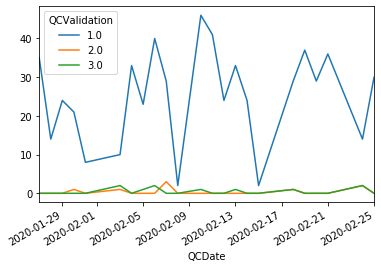

In [70]:
df_daily_unstacked_1.plot()

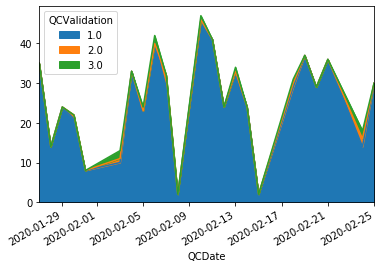

In [71]:
df_daily_unstacked_1.plot(kind='area')

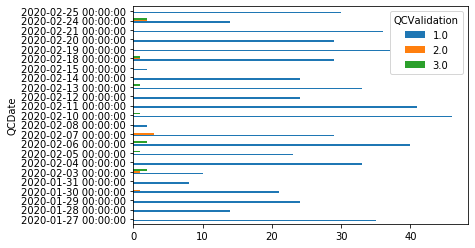

In [72]:
df_daily_unstacked_1.plot(kind='barh')

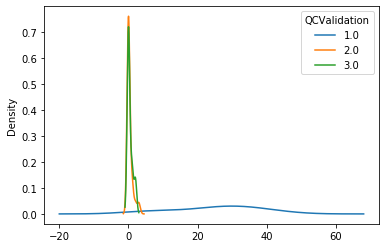

In [73]:
df_daily_unstacked_1.plot(kind='kde')

---
# WorkBook

timestamp for filename

In [74]:
ts_str = str(test_date)[:10] #str(pd.Timestamp.now())[:10]

create filename var

In [75]:
filename_str = str("QCMetrics_" + str(ts_str) + ".xlsx")

In [76]:
# CREATE NEW WORKBOOK
wb = Workbook()
wb.save(filename_str)

In [77]:
# LOAD EXISTING WORKBOOK
wb = load_workbook(filename_str)

In [78]:
# ADD SHEETS TO WORKBOOK
# DESGIGNATE SHEET NAME AND POSITION
sheet1 = wb.create_sheet('Table', 0)
sheet2 = wb.create_sheet('Graphs',1)

In [79]:
# ACTIVATE WORKSHEET TO WRITE DATAFRAME
active = wb['Table']

# WRTIE DATAFRAME TO ACTIVE WORKSHEET
for x in dataframe_to_rows(df_daily_unstacked_1): # {
    active.append(x)
# }

# SAVE 
wb.save(filename_str)

In [84]:
# CREATE DATASET
x = df_daily_unstacked_1.index
y = df_daily_unstacked_1.columns

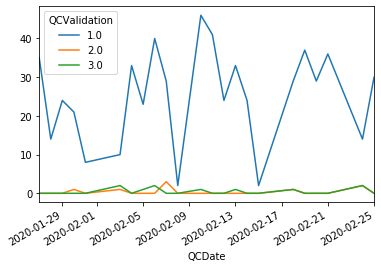

In [88]:
plt.show(df_daily_unstacked_1.plot())

In [ ]:
plt.savefig(ts_str + "_line_graph.png")

In [ ]:
# WRITE DATAFRAME TO ACTIVE WORKSHEET

---
# Create *empty* `DataFrame` to hold **FINAL** `Metrics` 
*(and lists to hold columns*)

In [ ]:
QCMetrics_Month = pd.DataFrame(data=None,
                              index=pd.date_range(start=one_month_ago,
                                                 end=test_date,
                                                 freq='D',
                                                 name='QCDate'),
                              columns=pd.CategoricalIndex(['L1', 'L2', 'L3'], name='Levels')
                              )

In [ ]:
QCMetrics_Month.index

In [ ]:
QCMetrics_Month.columns

In [ ]:
QCMetrics_Month

In [ ]:
df_daily_levels.head(5)

In [ ]:
result = df_daily_levels.join(QCMetrics_Month, 
                              on = ['QCDate'],
                              how='inner', 
                              sort=True)

In [ ]:
result

In [ ]:
result.info()

---
# messups

---

# `ExcelWorkBook` functions

In [ ]:
# str for filename
filename_str = str(test_date) #str(pd.Timestamp.now())[:10]
print(filename_str)

In [ ]:
# Create new workbook
wb = Workbook()

In [ ]:
# Add sheets to workbook
# Designate sheet name and position
sheet1 = wb.create_sheet('sheet1',0)
sheet2 = wb.create_sheet('sheet2',1)
sheet3 = wb.create_sheet('sheet3',2)

In [ ]:
# Activate worksheet to write dataframe
active = wb['sheet1']

# Write dataframe to active worksheet
for x in dataframe_to_rows(df_QCMetrics):
    active.append(x)

# Save workbook to write
wb.save(filepath)

In [ ]:
wb.save("QCMetrics-"  +  filename_str + ".xlsx")